<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Exploration
</div>

## Import

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Read universities data from file

In [13]:
universities_df = None
file_path ='../Data/processed/universities_processed.csv'

# Try to read the CSV file
try:
    universities_df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except pd.errors.EmptyDataError:
    print(f"File '{file_path}' is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")

In [14]:
universities_df.head()

,Institution Name,Region,Country,Overall,Academic Reputation,Employer Reputation,Faculty Student Ratio,Citations Per Faculty,International Faculty Ratio,International Students Ratio,International Research Network,Employment Outcomes,Sustainability
0,Massachusetts Institute of Technology (MIT),North America,United States,100.0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,95.2
1,University of Cambridge,Europe,United Kingdom,99.2,100.0,100.0,100.0,92.3,100.0,95.8,99.9,100.0,97.3
2,University of Oxford,Europe,United Kingdom,98.9,100.0,100.0,100.0,90.6,98.2,98.2,100.0,100.0,97.8
3,Harvard University,North America,United States,98.3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,96.7
4,Stanford University,North America,United States,98.1,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,94.4


### Câu hỏi: Sự biến động của danh tiếng trường đại học giữa các vùng có đặc điểm gì đặc biệt?

- Câu hỏi sẽ giúp ta thấy được sự đối lập giữa các vùng, và cách mà sự chênh lệch này có thể ảnh hưởng đến chất lượng đào tạo và nghiên cứu. Điều này có thể hỗ trợ quyết định của bạn khi chọn trường đại học hoặc hiểu rõ hơn về hệ thống giáo dục ở các khu vực khác nhau.

- Để trả lời, ta sẽ tính Average Academic Reputation & Average Employer Reputation giữa các Region sau đó thể hiện qua biểu đồ.

***Average Academic Reputation***

In [15]:
avg_academic_df = pd.DataFrame()

# Group by 'Region' and calculate the average academic reputation score
avg_academic_df = universities_df.groupby('Region')['Academic Reputation'].mean().reset_index()

# Rename the column to 'Average Academic Reputation'
avg_academic_df = avg_academic_df.rename(columns={'Academic Reputation': 'Average Academic Reputation'})

avg_academic_df

,Region,Average Academic Reputation
0,Africa,15.019231
1,Asia,20.496859
2,Europe,24.412245
3,Latin America,21.796117
4,North America,28.297030
5,Oceania,32.608889


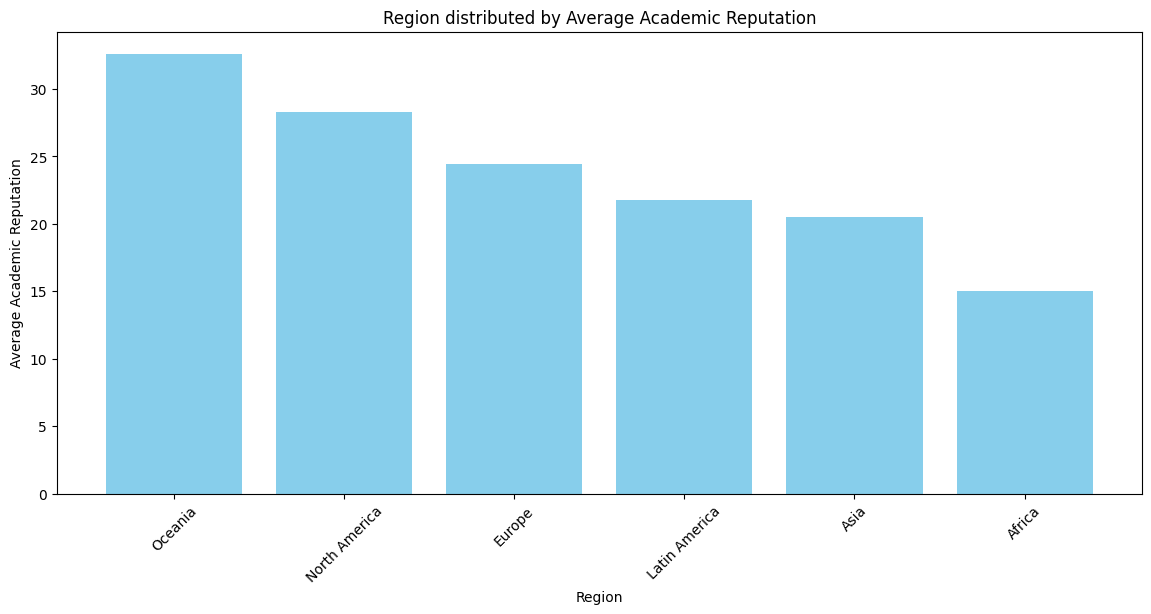

In [17]:
avg_academic_df = avg_academic_df.sort_values(by='Average Academic Reputation', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.bar(avg_academic_df['Region'], avg_academic_df['Average Academic Reputation'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Academic Reputation')
plt.title(f'Region distributed by Average Academic Reputation')
plt.xticks(rotation=45)
plt.show()

***Average Employer Reputation***

In [18]:
avg_employer_df = pd.DataFrame()

# Group by 'Region' and calculate the average Employer reputation score
avg_employer_df = universities_df.groupby('Region')['Employer Reputation'].mean().reset_index()

# Rename the column to 'Average Employer Reputation'
avg_employer_df = avg_employer_df.rename(columns={'Employer Reputation': 'Average Employer Reputation'})

avg_employer_df

,Region,Average Employer Reputation
0,Africa,17.176923
1,Asia,24.271466
2,Europe,21.046032
3,Latin America,28.814563
4,North America,24.992079
5,Oceania,27.088889


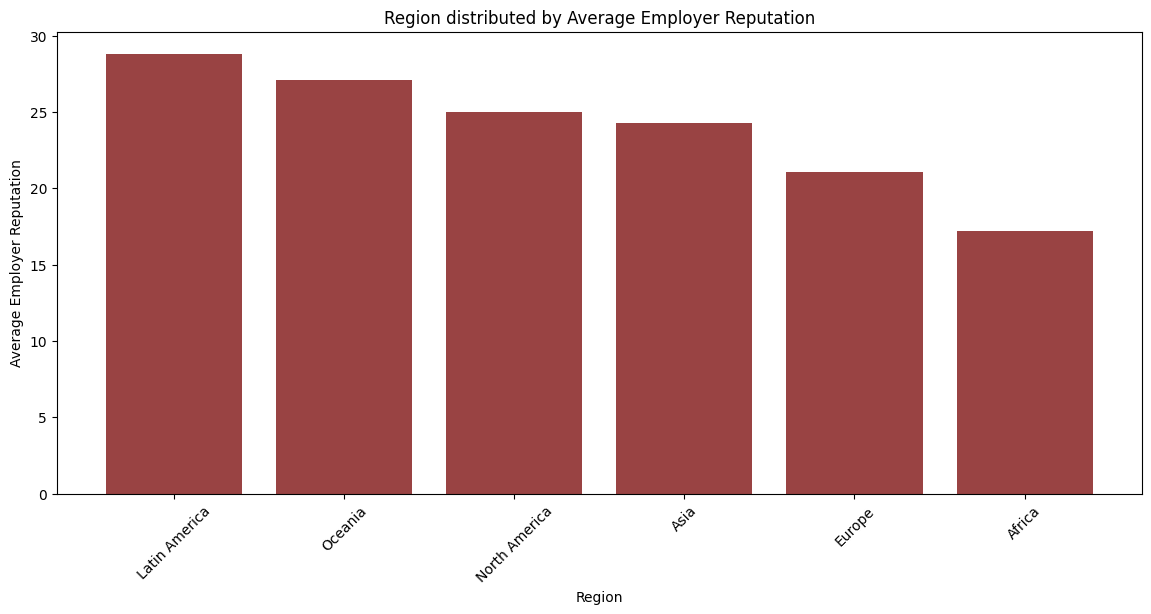

In [19]:
avg_employer_df = avg_employer_df.sort_values(by='Average Employer Reputation', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.bar(avg_employer_df['Region'], avg_employer_df['Average Employer Reputation'], color='#994343')
plt.xlabel('Region')
plt.ylabel('Average Employer Reputation')
plt.title(f'Region distributed by Average Employer Reputation')
plt.xticks(rotation=45)
plt.show()

- Châu Phi luôn nằm ở cuối về danh tiếng
- Tuy danh tiếng học thuật của Mĩ Latin không nằm top đầu nhưng danh tiếng tuyển dụng lại lớn nhất
- Châu Đại Dương và Bắc Mĩ có điểm danh tiếng cao ổn định top đầu ở cả 2 hạng mục